# Лабораторна робота №5
## Студента групи МІТ-31 (підгрупа 2)
## Маніла Дмитра Олексійовича

# Завдання
1.  Виконати вирішення задач регресії та класифікації для наборів даних, що використовувалися в лабораторних роботах 2,3 з використанням Tensorflow & NN
2.  Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab5.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mae, mse

In [3]:
model_1 = pd.read_csv("./owner.csv")

In [4]:
insurance = model_1
insurance.head()

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0
2,2,420,0,1,0,1,1
3,3,2893,1,1,0,0,1
4,4,4010,1,0,0,1,1


In [5]:
insurance.isna().sum()

Unnamed: 0    0
salary        0
age           0
degree        0
gender        0
credits       0
is_gamer      0
dtype: int64

In [6]:
insurance=pd.get_dummies(insurance)

insurance.head(3)

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0
2,2,420,0,1,0,1,1


In [7]:
X=insurance.drop("salary",axis=1)
y=insurance["salary"]

X.head(), y.head()

(   Unnamed: 0  age  degree  gender  credits  is_gamer
 0           0    0       0       1        1         0
 1           1    1       0       0        0         0
 2           2    0       1       0        1         1
 3           3    1       1       0        0         1
 4           4    1       0       0        1         1,
 0    3996
 1    1016
 2     420
 3    2893
 4    4010
 Name: salary, dtype: int64)

In [8]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)


tf.random.set_seed=13

ins_model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

ins_model.compile(
    loss='mse',
    optimizer=Adam(),
    metrics=['mse']
)

X_train.shape

(266, 6)

In [9]:
ins_history = ins_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
9/9 [==============================] - 1s 2ms/step - loss: 8891983.0000 - mse: 8891983.0000
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 8844877.0000 - mse: 8844877.0000
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 8796972.0000 - mse: 8796972.0000
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 8748783.0000 - mse: 8748783.0000
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 8701055.0000 - mse: 8701055.0000
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 8651463.0000 - mse: 8651463.0000
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 8601608.0000 - mse: 8601607.0000
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 8552108.0000 - mse: 8552108.0000
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 8499893.0000 - mse: 8499893.0000
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 84

In [10]:
ins_history2 = ins_model.fit(X_train,y_train,epochs=200, verbose=0)

score1=ins_model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 3505378.5000 - mse: 3505378.5000


In [11]:
ins_model.save("i_mod.h5")

ins_model_loaded=tf.keras.models.load_model("i_mod.h5")


y1=ins_model.predict(X_test)
y2=ins_model_loaded.predict(X_test)

(y1-y2).sum()

X_train.head()

,Unnamed: 0,age,degree,gender,credits,is_gamer
58,58,1,1,1,0,1
259,259,0,1,1,0,1
95,95,0,0,0,0,0
131,131,1,0,1,1,0
286,286,1,1,1,1,0


In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

insurance2 = model_1
insurance2.head(2)

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0


In [13]:
ct = make_column_transformer(
    (MinMaxScaler(),["age", "degree","gender"]), 
    (OneHotEncoder(handle_unknown="ignore"),['credits','is_gamer'])
)
X=insurance2.drop("salary", axis=1)
y = insurance2["salary"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

ct.fit(X_train)

X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

im3= tf.keras.Sequential([ 
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [14]:
im3.compile(
    loss=mae, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["mae"]
)
history_im3=im3.fit(X_train_norm,y_train,validation_split=0.3,epochs=30,verbose=0)

im3.evaluate(X_test_norm,y_test)

X_train.shape

3/3 [==============================] - 0s 2ms/step - loss: 2285.8467 - mae: 2285.8467


(266, 6)

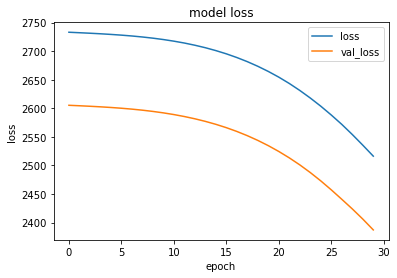

In [15]:
plt.plot(history_im3.history['loss'])
plt.plot(history_im3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [16]:
import matplotlib as plt
import sklearn.model_selection
import sklearn.datasets
import seaborn as sns

In [17]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [18]:
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [19]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [20]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [21]:
train_labels[7]

2

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

In [23]:
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3534 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2907 - accuracy: 0.1045 - val_loss: 2.2603 - val_accuracy: 0.1298
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2423 - accuracy: 0.1264 - val_loss: 2.2353 - val_accuracy: 0.1289
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0911 - accuracy: 0.1684 - val_loss: 1.8192 - val_accuracy: 0.2092
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7370 - accuracy: 0.2600 - val_loss: 1.6801 - val_accuracy:

In [24]:
train_data.min(), train_data.max()

# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [25]:
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2493 - accuracy: 0.5015 - val_loss: 0.9628 - val_accuracy: 0.6194
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8506 - accuracy: 0.6729 - val_loss: 0.7900 - val_accuracy: 0.7112
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7294 - accuracy: 0.7263 - val_loss: 0.7259 - val_accuracy: 0.7277
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6804 - accuracy: 0.7418 - val_loss: 0.6883 - val_accuracy: 0.7414
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6472 - accuracy: 0.7554 - val_loss: 0.6660 - val_accuracy: 0.7583
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6239 - accuracy: 0.7718 - val_loss: 0.6585 - val_accuracy: 0.7670
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6040 - accuracy: 0.7826 - val_loss: 0.6376 - val_accuracy:

<AxesSubplot:title={'center':'Normalized data'}>

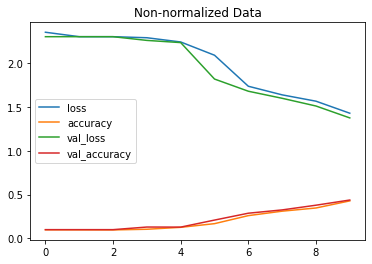

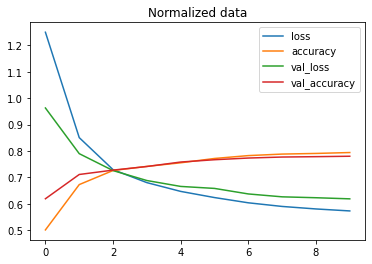

In [26]:
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [27]:
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1172 - accuracy: 0.5736 - val_loss: 0.7758 - val_accuracy: 0.7296
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7118 - accuracy: 0.7512 - val_loss: 0.6944 - val_accuracy: 0.7553
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6553 - accuracy: 0.7651 - val_loss: 0.6851 - val_accuracy: 0.7455
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6345 - accuracy: 0.7710 - val_loss: 0.6508 - val_accuracy: 0.7607
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6204 - accuracy: 0.7748 - val_loss: 0.6479 - val_accuracy: 0.7625
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6131 - accuracy: 0.7789 - val_loss: 0.6490 - val_accuracy: 0.7649
Epoch 7/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6085 - accuracy: 0.7788 - val_loss: 0.6235 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

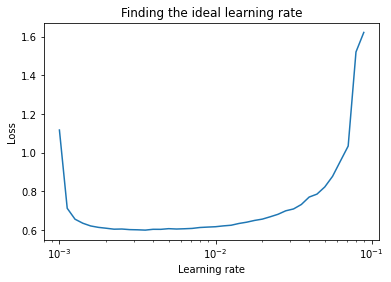

In [28]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [29]:
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0975 - accuracy: 0.6149 - val_loss: 0.8134 - val_accuracy: 0.7277
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7160 - accuracy: 0.7501 - val_loss: 0.7070 - val_accuracy: 0.7501
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6611 - accuracy: 0.7634 - val_loss: 0.6763 - val_accuracy: 0.7564
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6397 - accuracy: 0.7693 - val_loss: 0.6677 - val_accuracy: 0.7638
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6282 - accuracy: 0.7729 - val_loss: 0.6528 - val_accuracy: 0.7709
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6187 - accuracy: 0.7769 - val_loss: 0.6518 - val_accuracy: 0.7676
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6127 - accuracy: 0.7789 - val_loss: 0.6410 - val_accuracy:

In [30]:
y_probs = model_14.predict(test_data)

y_probs[:5]

array([[3.0912281e-10, 1.0448587e-11, 3.2489393e-15, 1.2826373e-10,
        2.3033721e-12, 7.1402681e-01, 5.1028717e-12, 7.0626691e-02,
        3.0256926e-05, 2.1531628e-01],
       [1.5237580e-05, 4.7169329e-04, 7.6923031e-01, 1.4885546e-04,
        1.6087419e-01, 1.2432788e-13, 3.6828663e-02, 1.3560311e-26,
        3.2431036e-02, 2.1208455e-29],
       [7.6090512e-09, 9.9780363e-01, 2.0242021e-08, 2.1826930e-03,
        4.6492730e-08, 2.0871854e-13, 1.4520826e-09, 3.7178243e-09,
        1.3592424e-05, 5.1258371e-17],
       [2.2396771e-10, 9.9926537e-01, 9.7494635e-10, 7.3165039e-04,
        4.4140109e-09, 2.2108947e-15, 4.1199759e-11, 3.9322556e-10,
        3.0241747e-06, 3.9877062e-19],
       [2.3668435e-01, 7.4016913e-03, 2.4136861e-01, 3.2926172e-02,
        2.7701654e-02, 1.1597935e-04, 4.3751600e-01, 1.8890540e-09,
        1.6285600e-02, 7.8072805e-11]], dtype=float32)

In [31]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(5, 'Sandal')

In [32]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([5, 2, 1, 1, 6, 1, 6, 6, 5, 7], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[804,   2,  17,  91,   2,   1,  74,   0,   9,   0],
       [  8, 921,   3,  56,   2,   0,   9,   0,   1,   0],
       [ 28,   1, 529,  17, 175,   0, 241,   0,   9,   0],
       [ 51,  34,   4, 815,  27,   1,  59,   3,   6,   0],
       [  2,   0,  70,  68, 728,   0, 128,   0,   4,   0],
       [  1,   0,   0,   1,   0, 911,   0,  50,   6,  31],
       [207,   0, 115,  75, 204,   0, 384,   1,  14,   0],
       [  0,   0,   0,   0,   0,  48,   0, 929,   1,  22],
       [  7,   0,  28,  15,   5,  10,  20,   5, 910,   0],
       [  0,   0,   0,   0,   0,  67,   0,  66,   0, 867]], dtype=int64)

In [34]:
import random
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

In [35]:
model_14.layers

In [36]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[-0.46976036,  0.01960626, -0.34197816,  0.5814653 ],
        [-0.652685  , -0.02304024, -0.12336614,  0.62138635],
        [-0.42349094,  0.03338134, -1.2069837 ,  0.5531393 ],
        ...,
        [-0.02057106,  0.04025377, -0.17187648, -0.6418347 ],
        [-0.03757751, -0.04308283,  0.2186969 , -0.8545105 ],
        [ 0.02141763, -0.00872664, -0.3682877 , -0.10482501]],
       dtype=float32),
 (784, 4))

In [37]:
biases, biases.shape

(array([ 1.0830986 , -0.00600367,  1.9257659 ,  0.8520019 ], dtype=float32),
 (4,))

In [38]:
model_14.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
